In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv (r'C:\Users\lucne\Downloads\ETSY.csv')
print (df)

           Date        Open        High         Low       Close   Adj Close  \
0    2021-02-16  238.949997  239.250000  226.095001  228.320007  228.320007   
1    2021-02-17  224.919998  225.000000  214.070007  222.410004  222.410004   
2    2021-02-18  216.050003  225.309998  215.104004  220.820007  220.820007   
3    2021-02-19  224.089996  230.429993  223.610001  227.270004  227.270004   
4    2021-02-22  222.860001  225.660004  211.750000  213.119995  213.119995   
..          ...         ...         ...         ...         ...         ...   
248  2022-02-08  134.639999  141.770004  133.809998  141.229996  141.229996   
249  2022-02-09  144.309998  146.929993  142.350006  146.610001  146.610001   
250  2022-02-10  142.270004  148.839996  140.770004  143.029999  143.029999   
251  2022-02-11  144.190002  145.649994  140.210007  141.770004  141.770004   
252  2022-02-14  141.710007  145.820007  140.199997  142.649994  142.649994   

      Volume  
0    2165900  
1    2391700  
2    1

In [5]:
def strategy(df, window = 1):
    df = df.copy()
    df['ret'] = np.log(df.Close.pct_change() + 1)
    df['prior_n'] = df.ret.rolling(window).sum()
    df.dropna(inplace=True)
    df['position'] = [1 if i > 0 else -1 for i in df.prior_n]
    df['strat'] = df.position.shift(1) * df.ret
    return np.exp(df[['ret','strat']].cumsum()).plot(figsize=(12,6))

<AxesSubplot:>

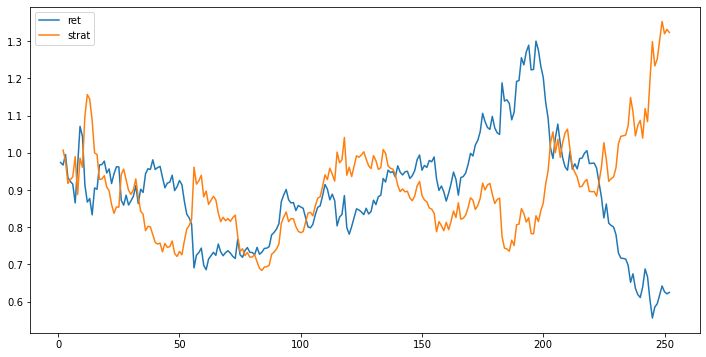

In [6]:
strategy(df,)

In [7]:
#INTRADAY
